In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
df = pd.read_csv('results.csv', sep=';', 
                 usecols=['race', 'cat', 'date', 'score', 'type', 'time', 'd_km', 'gain_m'],
                parse_dates={'date_parsed':['date']},
                keep_date_col=True 
                )

In [82]:
df['year'] = df['date_parsed'].dt.year

In [83]:
df.head()

,date_parsed,race,cat,type,d_km,gain_m,date,time,score,year
0,2011-10-04,Tesserete,Fun Masters,XC,20.00,NaN,10.04.2011,01:36:47,37.50,2011
1,2011-08-05,Solothurn XC,Fun Masters,XC,21.40,524,08.05.2011,01:13:04,27.59,2011
2,2011-07-16,Transalp 1.,Men,XCM,95.76,2348,16.07.2011,06:00:53,15.72,2011
3,2011-07-17,Transalp 2.,Men,XCM,68.75,2911,17.07.2011,05:49:05,26.91,2011
4,2011-07-18,Transalp 3.,Men,XCM,94.02,2154,18.07.2011,05:35:32,27.85,2011


In [90]:
# Classification or type of race
types = df['type'].unique()
# Years registered
years = df['year'].unique()

In [85]:
df.shape

(38, 10)

In [ ]:
df.loc[0]

In [86]:
races = df['race']
dates = df['date']
scores = df['score']
desc = races + '-' + dates
fifty = [50]*df.shape[0]

In [91]:
year_count = []
for y in years:
    year_count.append(len(df[df['year']==y]))

In [87]:
type_count = []
for t in types:
    type_count.append(len(df[df['type']==t]))

Time Period: 2011 to 2018
Total races: 38
XC 13
XCM 18
RR 3
CX 4
2011 10
2012 3
2013 7
2014 2
2015 5
2016 6
2017 4
2018 1


<IPython.core.display.Javascript object>


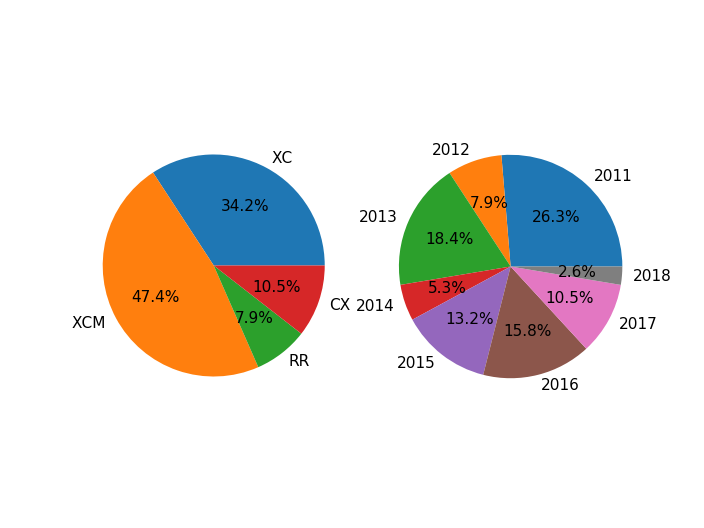

In [95]:
# Type Distribution
print('Time Period:', min(df['year']), 'to', max(df['year']))
print('Total races:', df.shape[0])

for i in range(len(types)):
    print(types[i], type_count[i])

for i in range(len(years)):
    print(years[i], year_count[i])
    
plt.subplot(121)
plt.pie(type_count, labels=types, autopct='%1.1f%%')
plt.axis('equal')
plt.subplot(122)
plt.pie(year_count, labels=years, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [96]:
above_fifty = 0
below_fifty = 0
for s in scores:
    if s > 50:
        above_fifty += 1
    else:
        below_fifty += 1

<IPython.core.display.Javascript object>


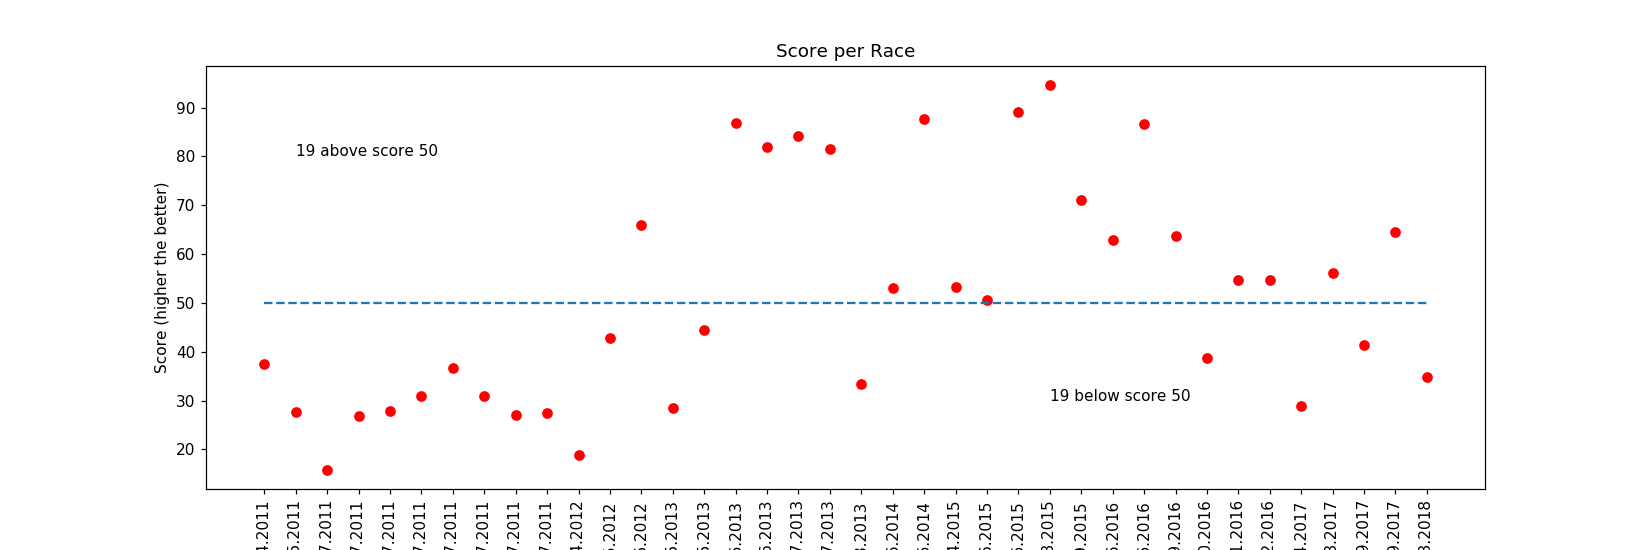

In [97]:
# Score Plot
plt.figure(figsize=(15,5))
plt.title('Score per Race')
plt.text(x=1, y=80, s=str(above_fifty) + ' above score 50')
plt.text(x=25, y=30, s=str(below_fifty) + ' below score 50')
plt.plot(df.index, scores, 'ro')
plt.plot(df.index, fifty, '--')
plt.xticks(np.arange(len(races)), desc, rotation='vertical')
plt.ylabel('Score (higher the better)')
plt.show()